# Basics of Data frame

In [1]:
import pandas as pd

In [3]:
weather_data = {
    'day': ['1/1/2017','1/2/2017','1/3/2017','1/4/2017','1/5/2017','1/6/2017'],
    'temperature': [32,35,28,24,32,31],
    'windspeed': [6,7,2,7,4,2],
    'event': ['Rain', 'Sunny', 'Snow','Snow','Rain', 'Sunny']
}
df = pd.DataFrame(weather_data)
#Always write D & F in capitals while writing dataframe word.
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow
3,1/4/2017,24,7,Snow
4,1/5/2017,32,4,Rain
5,1/6/2017,31,2,Sunny


In [4]:
#df.head()
df.head(3)

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow


In [6]:
#df.sample() #picks up random sample data.
df.sample(3)

,day,temperature,windspeed,event
4,1/5/2017,32,4,Rain
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny


In [9]:
df.tail(1)

,day,temperature,windspeed,event
5,1/6/2017,31,2,Sunny


In [5]:
df.dtypes

day            object
temperature     int64
windspeed       int64
event          object
dtype: object

Let's say we want to change type of 'day' column from object type to float type. For that we do:
<p> pd.to_numeric(df.day)

For ignoring errors. we use errors='coerce'.
<p> pd.to_numeric(df.TotalCharges,errors='coerce')

In [42]:
df.shape

(6, 4)

In [43]:
rows, columns = df.shape

In [44]:
rows

6

In [45]:
columns

4

In [13]:
df['temperature'].values.reshape(df.shape[0],1)
#Buddy, pta karo ki ye .reshape(df.shape[0],1) krta kya hai?
#we know that it converted column into 2D array

array([[32],
       [35],
       [28],
       [24],
       [32],
       [31]], dtype=int64)

In [14]:
df[2:5]

,day,temperature,windspeed,event
2,1/3/2017,28,2,Snow
3,1/4/2017,24,7,Snow
4,1/5/2017,32,4,Rain


In [50]:
df.columns

Index(['day', 'temperature', 'windspeed', 'event'], dtype='object')

In [51]:
df.day #another way: df['day']

0    1/1/2017
1    1/2/2017
2    1/3/2017
3    1/4/2017
4    1/5/2017
5    1/6/2017
Name: day, dtype: object

In [52]:
type(df.day) #columns in df are of type 'pandas series'.

pandas.core.series.Series

In [53]:
type(df.day[0])

str

In [54]:
#df['day'] = pd.to_datetime(df['day'])
#If the type of dates given in day column is str and we want to convert it from string to timestamp, we use above command.

In [56]:
df['event'].unique()    #For unique vlues in the column

array(['Rain', 'Sunny', 'Snow'], dtype=object)

In [57]:
df[['event', 'day']]

,event,day
0,Rain,1/1/2017
1,Sunny,1/2/2017
2,Snow,1/3/2017
3,Snow,1/4/2017
4,Rain,1/5/2017
5,Sunny,1/6/2017


In [58]:
df['temperature'].max() #same way: .min, .mean, .std

35

In [59]:
df.describe()

,temperature,windspeed
count,6.000000,6.000000
mean,30.333333,4.666667
std,3.829708,2.338090
min,24.000000,2.000000
25%,28.750000,2.500000
50%,31.500000,5.000000
75%,32.000000,6.750000
max,35.000000,7.000000


In [60]:
df[df.temperature>=32]
#for max values df[df.temperature==df.temperature.max] or as shown in above way. Above way is prefered when column name have spaces in it.

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
4,1/5/2017,32,4,Rain


In [61]:
df[['day']][df['temperature'] == df['temperature'].max()] #if we want only particular column (let's say, day on which temp. was max.) in o/p

,day
1,1/2/2017


In [62]:
df[['day','temperature']][df['temperature'] == df['temperature'].max()]

,day,temperature
1,1/2/2017,35


In [63]:
df.index

RangeIndex(start=0, stop=6, step=1)

In [64]:
#df.set_index('day') to make 'day' as an index but it returns o/p as a new df frame, in order to modify original use 'inplace'
df.set_index('day', inplace=True)

In [65]:
df

,temperature,windspeed,event
day,,,
1/1/2017,32,6,Rain
1/2/2017,35,7,Sunny
1/3/2017,28,2,Snow
1/4/2017,24,7,Snow
1/5/2017,32,4,Rain
1/6/2017,31,2,Sunny


In [66]:
df.loc['1/3/2017']

temperature      28
windspeed         2
event          Snow
Name: 1/3/2017, dtype: object

In [67]:
df.reset_index(inplace=True) #in order to reset originalindex
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow
3,1/4/2017,24,7,Snow
4,1/5/2017,32,4,Rain
5,1/6/2017,31,2,Sunny


In [68]:
drop1 = df.drop(['day'], axis=1) #To drop a column
drop1

#If we use inplace, it will change existing DF.
# df.drop(['temperature'], axis=1, inplace=True)
# df

,temperature,windspeed,event
0,32,6,Rain
1,35,7,Sunny
2,28,2,Snow
3,24,7,Snow
4,32,4,Rain
5,31,2,Sunny


In [69]:
drop2 = df.drop([0]) #To drop a row by index
drop2

,day,temperature,windspeed,event
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow
3,1/4/2017,24,7,Snow
4,1/5/2017,32,4,Rain
5,1/6/2017,31,2,Sunny


In [70]:
drop3 = df.drop(index=4, columns='event') #To drop row and column at the same time
drop3 

,day,temperature,windspeed
0,1/1/2017,32,6
1,1/2/2017,35,7
2,1/3/2017,28,2
3,1/4/2017,24,7
5,1/6/2017,31,2


In [14]:
x = df[['day','event']].values   #.values is used when we want x be 2D array, not a data frame
x

array([['1/1/2017', 'Rain'],
       ['1/2/2017', 'Sunny'],
       ['1/3/2017', 'Snow'],
       ['1/4/2017', 'Snow'],
       ['1/5/2017', 'Rain'],
       ['1/6/2017', 'Sunny']], dtype=object)

# Different ways of creating DF

## Reading csv file

In [9]:
df0 = pd.read_csv("C:\\Users\\Admin\\AppData\\Roaming\\Microsoft\\Excel\\weather_data.csv")
df0.head()
#If I would have saved my file in C:\Users\Admin\Tutorials, then i would have required to provide just file name. Bcz the code is also saved in the same 'C:\Users\Admin\Tutorials' folder.

,Day,Temperature,Windspeed,Event
0,01-01-2017,32,6,Rain
1,01-02-2017,35,7,Sunny
2,01-03-2017,28,2,Snow
3,01-04-2017,24,7,Snow
4,01-05-2017,32,4,Rain


In [10]:
df00 = pd.read_excel("C:\\Users\\Admin\\AppData\\Roaming\\Microsoft\\Excel\\weather_data.xlsx")
df00.head()
#Reading excel file

,Day,Temperature,Windspeed,Event
0,2017-01-01,32,6,Rain
1,2017-02-01,35,7,Sunny
2,2017-03-01,28,2,Snow
3,2017-04-01,24,7,Snow
4,2017-05-01,32,4,Rain


## By using data of another DF

In [11]:
df000 = df00[df00.Event=='Snow']
df000.head()

,Day,Temperature,Windspeed,Event
2,2017-03-01,28,2,Snow
3,2017-04-01,24,7,Snow


## Using dictionary

In [12]:
#As we did in the beginning. Refer 1st code

## Using [list(tuple)]

In [32]:
weather_data = [
    ('1/1/2017',32,6,'Rain'),
    ('1/2/2017',35,7,'Sunny'),
    ('1/3/2017',28,2,'Snow')
]
df = pd.DataFrame(data=weather_data, columns=['day','temperature','windspeed','event'])
df
#Using [list(tuple)] i.e. dictionary, for creating data frame.

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow


In [33]:
weather_data = [
    {'day': '1/1/2017', 'temperature': 32, 'windspeed': 6, 'event': 'Rain'},
    {'day': '1/2/2017', 'temperature': 35, 'windspeed': 7, 'event': 'Sunny'},
    {'day': '1/3/2017', 'temperature': 28, 'windspeed': 2, 'event': 'Snow'},
    
]
df = pd.DataFrame(data=weather_data, columns=['day','temperature','windspeed','event'])
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow


In [34]:
df1 = pd.read_csv("C:\\Users\\Admin\\AppData\\Roaming\\Microsoft\\Excel\\stock_data.csv")
df1
#o/p of next line code is original table. In this o/p, "Adeed for demo"  is a extra unwanted row.

,added for demo,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Tickers,eps,revenue,price,people
1,GOOGL,27.82,87,845,larry page
2,WMT,4.61,484,65,n.a.
3,MSFT,-1,85,64,bill gates
4,RIL,not available,50,1023,mukesh ambani
5,TATA,5.6,-1,n.a.,ratan tata


In [35]:
df1 = pd.read_csv("C:\\Users\\Admin\\AppData\\Roaming\\Microsoft\\Excel\\stock_data.csv", skiprows=1)
df1
# for removing unwanted headers. Eg: added for demo
#instead of sliprows, header=1 will do the same thing.

,Tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


In [36]:
df1 = pd.read_csv("C:\\Users\\Admin\\AppData\\Roaming\\Microsoft\\Excel\\stock_data.csv", header=None, names=["tickers", "eps", "revenue","price","people"])
df1
#adding headers if they aren't present

,tickers,eps,revenue,price,people
0,added for demo,NaN,NaN,NaN,NaN
1,Tickers,eps,revenue,price,people
2,GOOGL,27.82,87,845,larry page
3,WMT,4.61,484,65,n.a.
4,MSFT,-1,85,64,bill gates
5,RIL,not available,50,1023,mukesh ambani
6,TATA,5.6,-1,n.a.,ratan tata


In [37]:
df1 = pd.read_csv("C:\\Users\\Admin\\AppData\\Roaming\\Microsoft\\Excel\\stock_data.csv", nrows=3)
df1
#prints 3 rows excluding header.

,added for demo,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Tickers,eps,revenue,price,people
1,GOOGL,27.82,87,845,larry page
2,WMT,4.61,484,65,n.a.


In [38]:
df1 = pd.read_csv("C:\\Users\\Admin\\AppData\\Roaming\\Microsoft\\Excel\\stock_data.csv",na_values=["not available", "n.a."] )
df1
#converting not availbale or NA into na_values ie NaN

,added for demo,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Tickers,eps,revenue,price,people
1,GOOGL,27.82,87,845,larry page
2,WMT,4.61,484,65,NaN
3,MSFT,-1,85,64,bill gates
4,RIL,NaN,50,1023,mukesh ambani
5,TATA,5.6,-1,NaN,ratan tata


In [39]:
#if we want to convert values of only specific columns, then instead of using list we use dictionary.
#Let's say we want convert -1 of revenue column to NaN, but not that of eps.
#If we want to convert
df1 = pd.read_csv("C:\\Users\\Admin\\AppData\\Roaming\\Microsoft\\Excel\\stock_data.csv", na_values={
    "Unnamed: 1":["not available"],
    "Unnamed: 2":[-1],
    "Unnamed: 3":["n.a."],
    "Unnamed: 4":["n.a."]
})
df1

,added for demo,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Tickers,eps,revenue,price,people
1,GOOGL,27.82,87,845,larry page
2,WMT,4.61,484,65,NaN
3,MSFT,-1,85,64,bill gates
4,RIL,NaN,50,1023,mukesh ambani
5,TATA,5.6,NaN,NaN,ratan tata


In [40]:
df1.to_csv("new.csv")
#creates new csv file
#this file will have an extra index ie an extra column in the beginning, to remove that index: df.to_csv("new.csv", index=False)

In [41]:
df1.to_csv("new.csv", columns=["Unnamed: 1","Unnamed: 2"], index=False)
# to export only desired columns.

In [42]:
df2 =pd.read_excel("stock_data.xlsx", "Sheet1")
df2

,Tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


In [43]:
#To fill values in desired cells. using 'n.a.' as argument is bad idea, bcz it isn't specific to only 1 cell of the column.
def convert_people_cell(cell):
    if cell=="n.a.":
        return 'Sam Walton'
    return cell

def convert_price_cell(cell):
    if cell=="n.a.":
        return 50
    return cell

#Basically we define a fn to do our job,then use 'converters' which takes dictionary as argument.
df = pd.read_excel("stock_data.xlsx","Sheet1", converters= {
        'people': convert_people_cell,
        'price': convert_price_cell
    })
df

,Tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,Sam Walton
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,50,ratan tata


In [44]:
df.to_excel("new.xlsx", sheet_name="stocks", index=False)
#To write dataframe into excel file.

In [45]:
df.to_excel("new.xlsx", sheet_name="stocks", index=False, startrow=2, startcol=1)
#If we want to start writing from Row=1, column=2

In [46]:
#To write 2 dataframes in same excel file in 2 diff sheets.
df_stocks = pd.DataFrame({
    'tickers': ['GOOGL', 'WMT', 'MSFT'],
    'price': [845, 65, 64 ],
    'pe': [30.37, 14.26, 30.97],
    'eps': [27.82, 4.61, 2.12]
})

df_weather =  pd.DataFrame({
    'day': ['1/1/2017','1/2/2017','1/3/2017'],
    'temperature': [32,35,28],
    'event': ['Rain', 'Sunny', 'Snow']
})

In [47]:
with pd.ExcelWriter('stocks_weather.xlsx') as writer:
    df_stocks.to_excel(writer, sheet_name="stocks")
    df_weather.to_excel(writer, sheet_name="weather")

## Using datasets

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [6]:
dir(iris)                      #properties of dataset

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
iris.feature_names    #ie iris data set has these following columns.

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df15 = pd.DataFrame(iris.data, columns=iris.feature_names)
df15.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Handle missing data

In [48]:
df3 = pd.read_csv("weather_data.csv")
df3

,day,temperature,windspeed,event
0,01-01-17,32,6,Rain
1,01-02-17,-99999,7,Sunny
2,01-03-17,28,-99999,Snow
3,01-04-17,-99999,7,0
4,01-05-17,32,-99999,Rain
5,01-06-17,31,2,Sunny
6,01-07-17,34,5,0


In [49]:
#Here type of day column is str, to change it into date type, use parse_dates
df3 = pd.read_csv("weather_data.csv",parse_dates=['day'])
type(df3.day[0])

pandas._libs.tslibs.timestamps.Timestamp

In [50]:
df3 = pd.read_csv("weather_data.csv",parse_dates=['day'])
df3.set_index('day', inplace=True) #To set day column as index.
df3

,temperature,windspeed,event
day,,,
2017-01-01,32,6,Rain
2017-01-02,-99999,7,Sunny
2017-01-03,28,-99999,Snow
2017-01-04,-99999,7,0
2017-01-05,32,-99999,Rain
2017-01-06,31,2,Sunny
2017-01-07,34,5,0


## To replace all NaN with 0

In [51]:
df4 = df3.fillna(0)
df4

,temperature,windspeed,event
day,,,
2017-01-01,32,6,Rain
2017-01-02,-99999,7,Sunny
2017-01-03,28,-99999,Snow
2017-01-04,-99999,7,0
2017-01-05,32,-99999,Rain
2017-01-06,31,2,Sunny
2017-01-07,34,5,0


## To replace NaN of specific columns with specific values

In [52]:
df4=df3.fillna({
    'temperature': 0,
    'windspeed': 0,
    'event':'No event'
    })
df4

,temperature,windspeed,event
day,,,
2017-01-01,32,6,Rain
2017-01-02,-99999,7,Sunny
2017-01-03,28,-99999,Snow
2017-01-04,-99999,7,0
2017-01-05,32,-99999,Rain
2017-01-06,31,2,Sunny
2017-01-07,34,5,0


Refer 2.1 & 2.3 of ML file

## ffill & bfill

In [53]:
df4=df3.fillna(method="ffill") #ffill (means forward fill) replaces NaN value with previous day data ie vetrically downward

#df4=df3.fillna(method="bfill") #it replaces next day value ie vertically upward
#in above cases axis was equal to "index". ie axis="index" is default


#df4=df3.fillna(method="ffill", axis="columns") #it copies horizontally forward
#df4=df3.fillna(method="bfill", axis="columns") #it copies horizontally backward
df4

,temperature,windspeed,event
day,,,
2017-01-01,32,6,Rain
2017-01-02,-99999,7,Sunny
2017-01-03,28,-99999,Snow
2017-01-04,-99999,7,0
2017-01-05,32,-99999,Rain
2017-01-06,31,2,Sunny
2017-01-07,34,5,0


In [54]:
df4=df3.fillna(method="ffill", limit=1) #limit is the no. of NaN places we want to fill.
df4

,temperature,windspeed,event
day,,,
2017-01-01,32,6,Rain
2017-01-02,-99999,7,Sunny
2017-01-03,28,-99999,Snow
2017-01-04,-99999,7,0
2017-01-05,32,-99999,Rain
2017-01-06,31,2,Sunny
2017-01-07,34,5,0


## interpolate()

In [55]:
df4=df3.interpolate() 
#Better way of filling NaN data. default method of interpolation = linear interpolation.
#There are other methods as well
df4

,temperature,windspeed,event
day,,,
2017-01-01,32,6,Rain
2017-01-02,-99999,7,Sunny
2017-01-03,28,-99999,Snow
2017-01-04,-99999,7,0
2017-01-05,32,-99999,Rain
2017-01-06,31,2,Sunny
2017-01-07,34,5,0


In [56]:
df4=df3.interpolate(method='time')
df4
#For finding out NaN values it considers time/date also. 
#For 01/01, temp. being 32 and for 05/01, it was 28; for 04/01, by linear inter. method temp was 30 and by time method it was 29. For the span of 4 days temp=29 sounds more accurate.

,temperature,windspeed,event
day,,,
2017-01-01,32,6,Rain
2017-01-02,-99999,7,Sunny
2017-01-03,28,-99999,Snow
2017-01-04,-99999,7,0
2017-01-05,32,-99999,Rain
2017-01-06,31,2,Sunny
2017-01-07,34,5,0


## dropna()

In [57]:
df4=df3.dropna()
#Drops all rows which contain NaN values
df4

,temperature,windspeed,event
day,,,
2017-01-01,32,6,Rain
2017-01-02,-99999,7,Sunny
2017-01-03,28,-99999,Snow
2017-01-04,-99999,7,0
2017-01-05,32,-99999,Rain
2017-01-06,31,2,Sunny
2017-01-07,34,5,0


In [58]:
df4=df3.dropna(how="all")
#how='all': will drop only those rows which have all cells as NaN
df4

,temperature,windspeed,event
day,,,
2017-01-01,32,6,Rain
2017-01-02,-99999,7,Sunny
2017-01-03,28,-99999,Snow
2017-01-04,-99999,7,0
2017-01-05,32,-99999,Rain
2017-01-06,31,2,Sunny
2017-01-07,34,5,0


In [59]:
df4=df3.dropna(thresh=1)
#threshold=1 means keep all those rows which have at least 1 NON NaN value.
#thresh=1 and how=all will give same o/p. 
df4

,temperature,windspeed,event
day,,,
2017-01-01,32,6,Rain
2017-01-02,-99999,7,Sunny
2017-01-03,28,-99999,Snow
2017-01-04,-99999,7,0
2017-01-05,32,-99999,Rain
2017-01-06,31,2,Sunny
2017-01-07,34,5,0


# Add missing date

In [60]:
dt = pd.date_range("01-01-2017","01-11-2017")
idx = pd.DatetimeIndex(dt)
df4 = df3.reindex(idx)
df4

,temperature,windspeed,event
2017-01-01,32.0,6.0,Rain
2017-01-02,-99999.0,7.0,Sunny
2017-01-03,28.0,-99999.0,Snow
2017-01-04,-99999.0,7.0,0
2017-01-05,32.0,-99999.0,Rain
2017-01-06,31.0,2.0,Sunny
2017-01-07,34.0,5.0,0
2017-01-08,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN
2017-01-10,NaN,NaN,NaN


# Replace fn

In [61]:
import numpy as np

In [62]:
df5=pd.read_csv('data_of_weather.csv')
df5

,day,temperature,windspeed,event
0,01-01-17,32,6,Rain
1,01-02-17,-99999,7,Sunny
2,01-03-17,28,-99999,Snow
3,01-04-17,-99999,7,No event
4,01-05-17,32,-99999,Rain
5,01-06-17,31,2,Sunny
6,01-07-17,34,5,No event


In [63]:
df6=df5.replace(-99999,np.nan)
#Let's say we have 1 more special value -88888, then 
#df6=df5.replace([-99999,-88888],np.nan)
df6

,day,temperature,windspeed,event
0,01-01-17,32.0,6.0,Rain
1,01-02-17,NaN,7.0,Sunny
2,01-03-17,28.0,NaN,Snow
3,01-04-17,NaN,7.0,No event
4,01-05-17,32.0,NaN,Rain
5,01-06-17,31.0,2.0,Sunny
6,01-07-17,34.0,5.0,No event


## using dictionary for replacing multiple values

In [64]:
#For replacing values specific values in specific columns, we use dictionary
df6=df5.replace({
    'temperature': -99999,
    'windspeed': -99999,
    'event': 'No event'
}, np.nan)
df6

,day,temperature,windspeed,event
0,01-01-17,32.0,6.0,Rain
1,01-02-17,NaN,7.0,Sunny
2,01-03-17,28.0,NaN,Snow
3,01-04-17,NaN,7.0,NaN
4,01-05-17,32.0,NaN,Rain
5,01-06-17,31.0,2.0,Sunny
6,01-07-17,34.0,5.0,NaN


In [65]:
#Let's say we want to replace 0 in event column with "Sunny"
df6=df5.replace({
    -99999 : np.nan,
    'No event' : 'Sunny'
})
df6

,day,temperature,windspeed,event
0,01-01-17,32.0,6.0,Rain
1,01-02-17,NaN,7.0,Sunny
2,01-03-17,28.0,NaN,Snow
3,01-04-17,NaN,7.0,Sunny
4,01-05-17,32.0,NaN,Rain
5,01-06-17,31.0,2.0,Sunny
6,01-07-17,34.0,5.0,Sunny


## Regex

In [66]:
df6 = df5.replace('[A-Za-z]','',regex=True)
#If there are suffix such as: windspeed is 6 mph, 7 mph & temperature is 32 F, 28 F etc. and we want to remove those suffixs.
#Regex will remove all alphabetical words from DF
df6

,day,temperature,windspeed,event
0,01-01-17,32,6,
1,01-02-17,-99999,7,
2,01-03-17,28,-99999,
3,01-04-17,-99999,7,
4,01-05-17,32,-99999,
5,01-06-17,31,2,
6,01-07-17,34,5,


In [67]:
#Since we don't want to remove aplphabetical words from 'event' column. we will use dictionary.
df6 = df5.replace({'temperature': '[A-Za-z]',
                   'windspeed': '[a-z]'
                  },'', regex=True) 
df6

,day,temperature,windspeed,event
0,01-01-17,32,6,Rain
1,01-02-17,-99999,7,Sunny
2,01-03-17,28,-99999,Snow
3,01-04-17,-99999,7,No event
4,01-05-17,32,-99999,Rain
5,01-06-17,31,2,Sunny
6,01-07-17,34,5,No event


## Replace a list with another list.

In [68]:
df6 = pd.DataFrame({
    'score': ['exceptional','average', 'good', 'poor', 'average', 'exceptional'],
    'student': ['rob', 'maya', 'parthiv', 'tom', 'julian', 'erica']
})
df6

,score,student
0,exceptional,rob
1,average,maya
2,good,parthiv
3,poor,tom
4,average,julian
5,exceptional,erica


In [69]:
df7 = df6.replace(['poor', 'average', 'good', 'exceptional'], [1,2,3,4])
df7

,score,student
0,4,rob
1,2,maya
2,3,parthiv
3,1,tom
4,2,julian
5,4,erica


# Group By

In [4]:
df8 = pd.read_csv("weather_by_cities.csv")
df8

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


In [5]:
g = df8.groupby('city')
#This is similar to SQL command: SELECT * from weather_data GROUP BY city.
g

In [7]:
g = df8.groupby('city').mean()       #Gives average temp. of each city.
g

,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


In [72]:
for city, city_df in g:
    print(city)
    print(city_df)
#To get cities and thier DF

mumbai
        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain
new york
        day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny
paris
         day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy


In [73]:
g.get_group('mumbai')
#To get DF of mumbai only

,day,city,temperature,windspeed,event
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain


In [74]:
g.max()
#same goes for .min(), .average(), .median(), .mean(), .size(), .count() etc.

,day,temperature,windspeed,event
city,,,,
mumbai,1/4/2017,92,15,Sunny
new york,1/4/2017,36,12,Sunny
paris,1/4/2017,54,20,Sunny


This method of splitting (by using groupby) your dataset in smaller groups and then applying an operation (such as min or max) to get aggregate result(ie o/p of operations) is called Split-Apply-Combine.

In [75]:
g.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

city
mumbai      AxesSubplot(0.125,0.125;0.775x0.755)
new york    AxesSubplot(0.125,0.125;0.775x0.755)
paris       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

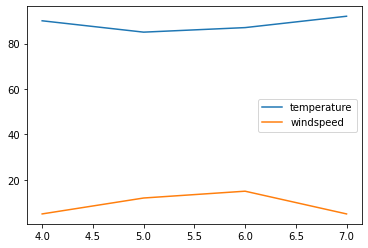

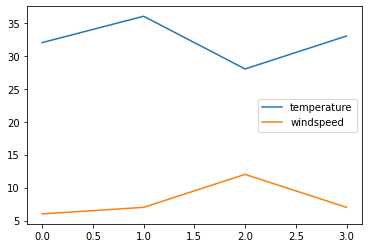

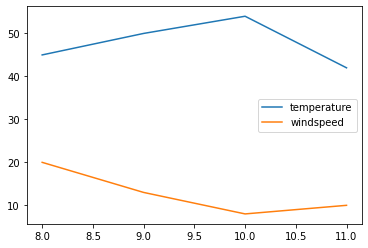

In [76]:
%matplotlib inline
g.plot()

Following custom fn code was just copy pasted for future refrence.

Group data using custom function: Let's say you want to group your data using custom function. Here the requirement is to create three groups:
1. Days when temperature was between 80 and 90
2. Days when it was between 50 and 60
3. Days when it was anything else

In [77]:
def grouper(df8, idx, col):
    if 80 <= df8[col].loc[idx] <= 90:
        return '80-90'
    elif 50 <= df8[col].loc[idx] <= 60:
        return '50-60'
    else:
        return 'others'

In [78]:
g = df8.groupby(lambda x: grouper(df8, x, 'temperature'))
g

In [79]:
for key, d in g:
    print("Group by Key: {}\n".format(key))
    print(d)

Group by Key: 50-60

         day   city  temperature  windspeed   event
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
Group by Key: 80-90

        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
Group by Key: others

         day      city  temperature  windspeed   event
0   1/1/2017  new york           32          6    Rain
1   1/2/2017  new york           36          7   Sunny
2   1/3/2017  new york           28         12    Snow
3   1/4/2017  new york           33          7   Sunny
7   1/4/2017    mumbai           92          5    Rain
8   1/1/2017     paris           45         20   Sunny
11  1/4/2017     paris           42         10  Cloudy


# Concat Function

In [80]:
india_weather = pd.DataFrame({
    "city": ["mumbai","delhi","banglore"],
    "temperature": [32,45,30],
    "humidity": [80, 60, 78]
})
india_weather

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78


In [81]:
us_weather = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
    "humidity": [68, 65, 75]
})
us_weather

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [82]:
pd.concat([india_weather, us_weather])

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [83]:
pd.concat([india_weather, us_weather], ignore_index=True)
#To get continuous index

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78
3,new york,21,68
4,chicago,14,65
5,orlando,35,75


## Pass 'keys'

In [84]:
df = pd.concat([india_weather, us_weather], keys=["india", "us"])
#ignore_index should be kept as false for 'keys' to work.
df

city  temperature  humidity
india 0    mumbai           32        80
      1     delhi           45        60
      2  banglore           30        78
us    0  new york           21        68
      1   chicago           14        65
      2   orlando           35        75

In [85]:
df.loc["us"]
#df.loc["india"]
#Keys are used to get original DF back from big DF (which was created by merging small DFs.)

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


## Axis argument in concat fn

In [86]:
temperature_df = pd.DataFrame({
    "city": ["mumbai","delhi","banglore"],
    "temperature": [32,45,30],
})
temperature_df

,city,temperature
0,mumbai,32
1,delhi,45
2,banglore,30


In [87]:
windspeed_df = pd.DataFrame({
    "city": ["mumbai", "delhi", "banglore"],
    "windspeed": [7,12,31],
})
windspeed_df

,city,windspeed
0,mumbai,7
1,delhi,12
2,banglore,31


In [88]:
#df = pd.concat([temperature_df,windspeed_df]) #It will arrange 2 DFs one over another. ie 2nd DF will be appended as new rows.

#To arrrange DFs side by side(ie to append 2nd DF as new columns), use axis=1 or axis='columns'
df = pd.concat([temperature_df,windspeed_df], axis=1)
df

,city,temperature,city,windspeed
0,mumbai,32,mumbai,7
1,delhi,45,delhi,12
2,banglore,30,banglore,31


Let's say, data isn't in order. So 1st we want to match city names, then temp & windspeed. we do that by using index command.
#Index is used to aline rows from different DFs.

In [90]:
temperature_df1 = pd.DataFrame({
    "city": ["mumbai","delhi","banglore"],
    "temperature": [32,45,30],
}, index=[0,1,2])
temperature_df1

,city,temperature
0,mumbai,32
1,delhi,45
2,banglore,30


In [91]:
windspeed_df1 = pd.DataFrame({
    "city": ["delhi","mumbai"],
    "windspeed": [7,12],
}, index=[1,0])
windspeed_df1

,city,windspeed
1,delhi,7
0,mumbai,12


In [92]:
df = pd.concat([temperature_df1,windspeed_df1], axis=1)
df

,city,temperature,city,windspeed
0,mumbai,32,mumbai,12.0
1,delhi,45,delhi,7.0
2,banglore,30,NaN,NaN


# Series fn: Joining a series and a DF


In [93]:
s = pd.Series(["Humid","Dry","Rain"], name="event")
s

0    Humid
1      Dry
2     Rain
Name: event, dtype: object

In [94]:
df8 = pd.concat([temperature_df,s],axis=1)
df8

,city,temperature,event
0,mumbai,32,Humid
1,delhi,45,Dry
2,banglore,30,Rain


# Merge DFs

In [95]:
df9 = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
})
df9

,city,temperature
0,new york,21
1,chicago,14
2,orlando,35


In [96]:
df10 = pd.DataFrame({
    "city": ["chicago","new york","orlando"],
    "humidity": [65,68,75],
})
df10

,city,humidity
0,chicago,65
1,new york,68
2,orlando,75


In [97]:
df3 = pd.merge(df9, df10, on="city")
df3

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [98]:
df11 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35, 38],
})
df11

,city,temperature
0,new york,21
1,chicago,14
2,orlando,35
3,baltimore,38


In [99]:

df12 = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "humidity": [65,68,71],
})
df12

,city,humidity
0,chicago,65
1,new york,68
2,san diego,71


In [100]:
df13=pd.merge(df11,df12,on="city",how="inner")
#similar to INNER join from SQL. It gives only df11 ∩ df12 values.
df13

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65


In [101]:
df13=pd.merge(df11,df12,on="city",how="outer")
#similar to OUTER join from SQL. It gives only df11 U df12 values.
df13

,city,temperature,humidity
0,new york,21.0,68.0
1,chicago,14.0,65.0
2,orlando,35.0,NaN
3,baltimore,38.0,NaN
4,san diego,NaN,71.0


In [102]:
df13=pd.merge(df11,df12,on="city",how="left") 
#similar to LEFT join from SQL. It gives all values of left DF and df11 ∩ df12 only.

#df13=pd.merge(df11,df12,on="city",how="right")
##similar to RIGHT join from SQL. It gives all values of right DF and df11 ∩ df12 only.
df13

,city,temperature,humidity
0,new york,21,68.0
1,chicago,14,65.0
2,orlando,35,NaN
3,baltimore,38,NaN


## Indicator Flag in Join

In [103]:
df13=pd.merge(df11,df12,on="city",how="outer",indicator=True)
df13

,city,temperature,humidity,_merge
0,new york,21.0,68.0,both
1,chicago,14.0,65.0,both
2,orlando,35.0,NaN,left_only
3,baltimore,38.0,NaN,left_only
4,san diego,NaN,71.0,right_only


# Suffixes argument in DFs

when there are 2 columns with same header, then suffixes are labeled (by default as x & y).
To customise suffixes, use suffixes=().

In [104]:
df14 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35,38],
    "humidity": [65,68,71, 75]
})
df14

,city,temperature,humidity
0,new york,21,65
1,chicago,14,68
2,orlando,35,71
3,baltimore,38,75


In [105]:
df15 = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "temperature": [21,14,35],
    "humidity": [65,68,71]
})
df15

,city,temperature,humidity
0,chicago,21,65
1,new york,14,68
2,san diego,35,71


In [106]:
df16= pd.merge(df14,df15,on="city")
df16

,city,temperature_x,humidity_x,temperature_y,humidity_y
0,new york,21,65,14,68
1,chicago,14,68,21,65


In [107]:
df16= pd.merge(df14,df15,on="city", how="outer", suffixes=('_first','_second'))
df16

,city,temperature_first,humidity_first,temperature_second,humidity_second
0,new york,21.0,65.0,14.0,68.0
1,chicago,14.0,68.0,21.0,65.0
2,orlando,35.0,71.0,NaN,NaN
3,baltimore,38.0,75.0,NaN,NaN
4,san diego,NaN,NaN,35.0,71.0


# Pivot Table

In [108]:
#Pivot allows to transform or reshape data.
#Pivot table allows to summarize or aggregate data inside DF

In [109]:
df17=pd.read_csv("weather.csv")
df17

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,66,58
2,5/3/2017,new york,68,60
3,5/1/2017,mumbai,75,80
4,5/2/2017,mumbai,78,83
5,5/3/2017,mumbai,82,85
6,5/1/2017,beijing,80,26
7,5/2/2017,beijing,77,30
8,5/3/2017,beijing,79,35


In [110]:
df17.pivot(index='date', columns='city')

temperature                 humidity                
city         beijing mumbai new york  beijing mumbai new york
date                                                         
5/1/2017          80     75       65       26     80       56
5/2/2017          77     78       66       30     83       58
5/3/2017          79     82       68       35     85       60

In [111]:
df17.pivot(index='date', columns='city', values='humidity')

city,beijing,mumbai,new york
date,,,
5/1/2017,26,80,56
5/2/2017,30,83,58
5/3/2017,35,85,60


In [112]:
df17.pivot(index='humidity', columns='city')

date                     temperature                
city       beijing    mumbai  new york     beijing mumbai new york
humidity                                                          
26        5/1/2017       NaN       NaN        80.0    NaN      NaN
30        5/2/2017       NaN       NaN        77.0    NaN      NaN
35        5/3/2017       NaN       NaN        79.0    NaN      NaN
56             NaN       NaN  5/1/2017         NaN    NaN     65.0
58             NaN       NaN  5/2/2017         NaN    NaN     66.0
60             NaN       NaN  5/3/2017         NaN    NaN     68.0
80             NaN  5/1/2017       NaN         NaN   75.0      NaN
83             NaN  5/2/2017       NaN         NaN   78.0      NaN
85             NaN  5/3/2017       NaN         NaN   82.0      NaN

In [113]:
df18 = pd.read_csv('weather2.csv')
df18

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/1/2017,new york,61,54
2,5/2/2017,new york,70,60
3,5/2/2017,new york,72,62
4,5/1/2017,mumbai,75,80
5,5/1/2017,mumbai,78,83
6,5/2/2017,mumbai,82,85
7,5/2/2017,mumbai,80,26


In [114]:
df18.pivot_table(index="city",columns="date") #aggfunc=mean is default command in pivot table.
#df18.pivot_table(index="city",columns="date", aggfunc=np.sum) #likewise instead of 'sum' we can use other numpy fns also.

humidity          temperature         
date     5/1/2017 5/2/2017    5/1/2017 5/2/2017
city                                           
mumbai       81.5     55.5        76.5     81.0
new york     55.0     61.0        63.0     71.0

## Margin

In [115]:
df18.pivot_table(index="city",columns="date", margins=True,aggfunc=np.sum)
#Adds 'All' column & 'All' row in the table which contains avg of that column and row respectively.

humidity               temperature              
date     5/1/2017 5/2/2017  All    5/1/2017 5/2/2017  All
city                                                     
mumbai        163      111  274         153      162  315
new york      110      122  232         126      142  268
All           273      233  506         279      304  583

In [116]:
df19 = pd.read_csv('weather3.csv')
df19

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,61,54
2,5/3/2017,new york,70,60
3,12/1/2017,new york,30,50
4,12/2/2017,new york,28,52
5,12/3/2017,new york,25,51


In [117]:
type(df19.date[0])

str

In [118]:
df19['date'] = pd.to_datetime(df19['date'])

In [119]:
df19.pivot_table(index=pd.Grouper(freq='M',key='date'),columns='city')
#'Freq= M' means use month as a grouper(we can use various other groupers also).
#'key' is the column on which we want to apply grouper.
#Type of date should be timetsamp, not string for using Freq='M'.

,humidity,temperature
city,new york,new york
date,,
2017-05-31,56.666667,65.333333
2017-12-31,51.000000,27.666667


# Melt fn

In [120]:
#melt fn is used to transform or reshape data

In [121]:
df20 = pd.read_csv('weather4.csv')
df20

,day,chicago,chennai,berlin
0,Monday,32,75,41
1,Tuesday,30,77,43
2,Wednesday,28,75,45
3,Thursday,22,82,38
4,Friday,30,83,30
5,Saturday,20,81,45
6,Sunday,25,77,47


In [122]:
df21 = pd.melt(df20, id_vars=["day"])
#id_vars: X axis 
df21

,day,variable,value
0,Monday,chicago,32
1,Tuesday,chicago,30
2,Wednesday,chicago,28
3,Thursday,chicago,22
4,Friday,chicago,30
5,Saturday,chicago,20
6,Sunday,chicago,25
7,Monday,chennai,75
8,Tuesday,chennai,77
9,Wednesday,chennai,75


In [123]:
df21[df21['variable']=="chicago"]
#If we want only Chicago's data.

,day,variable,value
0,Monday,chicago,32
1,Tuesday,chicago,30
2,Wednesday,chicago,28
3,Thursday,chicago,22
4,Friday,chicago,30
5,Saturday,chicago,20
6,Sunday,chicago,25


In [124]:
df21 = pd.melt(df20, id_vars=["day"], var_name='city', value_name='temperature')
df21
#To chnage the column names from default names 'variable' & 'value' to 'city' and 'temperature'.

,day,city,temperature
0,Monday,chicago,32
1,Tuesday,chicago,30
2,Wednesday,chicago,28
3,Thursday,chicago,22
4,Friday,chicago,30
5,Saturday,chicago,20
6,Sunday,chicago,25
7,Monday,chennai,75
8,Tuesday,chennai,77
9,Wednesday,chennai,75


# Stack & Unstack

In [125]:
df22 = pd.read_excel("stocks.xlsx", header=[0,1],index_col=[0]) 
#Don't forget to specify headers.
#index_col: This is to allow you to set which columns to be used as the index of the dataframe. The default value is None, and pandas will add a new column start from 0 to specify the index column.
df22

Price                  Price to earnings ratio (P/E)         \
Company    Facebook Google Microsoft                      Facebook Google   
2017-06-05      155    955        66                         37.10   32.0   
2017-06-06      150    987        69                         36.98   31.3   
2017-06-07      153    963        62                         36.78   31.7   
2017-06-08      155   1000        61                         36.11   31.2   
2017-06-09      156   1012        66                         37.07   30.0   

                      
Company    Microsoft  
2017-06-05     30.31  
2017-06-06     30.56  
2017-06-07     30.46  
2017-06-08     30.11  
2017-06-09     31.00

## Stacking

In [126]:
df22.stack()
#If there are multiple header rows, then inner most header row will be the default level.
#Here we have 0 & 1 two levels, so level=1 will be default level. If we have 3 levels 0,1,2; then level=2 will be default level.
#For more: check 3 level header example given below.

#df22.stack(level=0)
#If we want 1st row as our level (ie level=0)

#dropna=True. If set true, it drops NaN values.

Price  Price to earnings ratio (P/E)
           Company                                        
2017-06-05 Facebook     155                          37.10
           Google       955                          32.00
           Microsoft     66                          30.31
2017-06-06 Facebook     150                          36.98
           Google       987                          31.30
           Microsoft     69                          30.56
2017-06-07 Facebook     153                          36.78
           Google       963                          31.70
           Microsoft     62                          30.46
2017-06-08 Facebook     155                          36.11
           Google      1000                          31.20
           Microsoft     61                          30.11
2017-06-09 Facebook     156                          37.07
           Google      1012                          30.00
           Microsoft     66                          31.00

## Unstacking

In [127]:
a#df22_stacked=df22.stack()
#df22_stacked
df22_stacked.unstack()

NameError: name 'a' is not defined

In [128]:
df23 = pd.read_excel("stocks_3_levels.xlsx", header=[0,1,2], index_col=[0])

df23

Price Ratios                                                        \
               Price                  Price to earnings ratio (P/E)          
Company     Facebook Google Microsoft                      Facebook Google   
Q1 2016          155    955        66                         37.10   32.0   
Q2 2016          150    987        69                         36.98   31.3   
Q3 2016          153    963        62                         36.78   31.7   
Q4 2016          155   1000        61                         36.11   31.2   
Q1 2017          156   1012        66                         37.07   30.0   

                  Income Statement                                     \
                         Net Sales                  Net Profit          
Company Microsoft         Facebook Google Microsoft   Facebook Google   
Q1 2016     30.31              2.6     20     18.70       0.80   5.43   
Q2 2016     30.56              3.1     22     21.30       0.97   5.89   
Q3 2016     30.46              4.3     24     21.45       1.20   6.10   
Q4 2016     30.11              6.7     26     21.88       1.67   6.50   
Q1 2017     31.00              8.1     31     22.34       2.03   6.40   

                   
                   
Company Microsoft  
Q1 2016      4.56  
Q2 2016      5.10  
Q3 2016      5.43  
Q4 2016      5.89  
Q1 2017      6.09

In [129]:
df23.stack() #By default level is equal to 2
#df23.stack(0) # To make 1st row as level
#df23.stack(1) # To make 2nd row as level

Income Statement           Price Ratios  \
                        Net Profit Net Sales        Price   
        Company                                             
Q1 2016 Facebook              0.80      2.60          155   
        Google                5.43     20.00          955   
        Microsoft             4.56     18.70           66   
Q2 2016 Facebook              0.97      3.10          150   
        Google                5.89     22.00          987   
        Microsoft             5.10     21.30           69   
Q3 2016 Facebook              1.20      4.30          153   
        Google                6.10     24.00          963   
        Microsoft             5.43     21.45           62   
Q4 2016 Facebook              1.67      6.70          155   
        Google                6.50     26.00         1000   
        Microsoft             5.89     21.88           61   
Q1 2017 Facebook              2.03      8.10          156   
        Google                6.40     31.00         1012   
        Microsoft             6.09     22.34           66   

                                                 
                  Price to earnings ratio (P/E)  
        Company                                  
Q1 2016 Facebook                          37.10  
        Google                            32.00  
        Microsoft                         30.31  
Q2 2016 Facebook                          36.98  
        Google                            31.30  
        Microsoft                         30.56  
Q3 2016 Facebook                          36.78  
        Google                            31.70  
        Microsoft                         30.46  
Q4 2016 Facebook                          36.11  
        Google                            31.20  
        Microsoft                         30.11  
Q1 2017 Facebook                          37.07  
        Google                            30.00  
        Microsoft                         31.00

# Crosstab AKA Contingency Table

In [130]:
#It displays frequency distribution of variables.

In [131]:
df24 = pd.read_excel("survey.xls")
df24

,Name,Nationality,Sex,Age,Handedness
0,Kathy,USA,Female,23,Right
1,Linda,USA,Female,18,Right
2,Peter,USA,Male,19,Right
3,John,USA,Male,22,Left
4,Fatima,Bangadesh,Female,31,Left
5,Kadir,Bangadesh,Male,25,Left
6,Dhaval,India,Male,35,Left
7,Sudhir,India,Male,31,Left
8,Parvir,India,Male,37,Right
9,Yan,China,Female,52,Right


In [132]:
pd.crosstab(df24.Nationality,df24.Handedness)
#pd.crosstab(df24.Sex,df24.Handedness)
#1st df. is for X axis/row, 2nd df. is for Y axis/column

Handedness,Left,Right
Nationality,,
Bangadesh,2,0
China,2,1
India,2,1
USA,1,3


In [133]:
#Multi Index Column and Rows:
pd.crosstab(df24.Sex, [df24.Handedness,df24.Nationality])

Handedness       Left                 Right          
Nationality Bangadesh China India USA China India USA
Sex                                                  
Female              1     1     0   0     1     0   2
Male                1     1     2   1     0     1   1

In [134]:
pd.crosstab([df24.Nationality, df24.Sex], [df24.Handedness])

Handedness          Left  Right
Nationality Sex                
Bangadesh   Female     1      0
            Male       1      0
China       Female     1      1
            Male       1      0
India       Male       2      1
USA         Female     0      2
            Male       1      1

In [135]:
#Margins : It gives total.
pd.crosstab(df24.Sex,df24.Handedness, margins=True)

Handedness,Left,Right,All
Sex,,,
Female,2,3,5
Male,5,2,7
All,7,5,12


pd.crosstab(df24.Sex, df24.Handedness, normalize='index')
#To calculate %

In [136]:
pd.crosstab(df24.Sex, df24.Handedness, values=df24.Age, aggfunc=np.average)
#To calculate avg age of left handed & right handed of male & female respectively.

Handedness,Left,Right
Sex,,
Female,44.5,31.0
Male,31.2,28.0


# SQL & Pandas

In [137]:
import pandas as pd
import sqlalchemy

In [138]:
#Tutorila 14: Didn't understand anything. Do it from somewhere else.

# Memory optimization tips:

In [139]:
#Don't load all the columns from the file. load only required columns.
#instead of df = pd.read_csv('whole file.csv'), use df=df[["1st column", "2nd column"]]

In [140]:
#use lighter numerical datatypes. use int8 instead of int 64 for lighter numericals.
#df = pd.read_csv("file.csv", dtype={"column name having numeric values"} : {"int8"})

# Pandas Time Series Analysis

Timeseries is a set of data points indexed in time order

In [2]:
df = pd.read_csv("aapl.csv",)
df

,Date,Open,High,Low,Close,Volume
0,2017-06-01,153.17,153.33,152.22,153.18,16404088
1,2017-06-02,153.58,155.45,152.89,155.45,27770715
2,2017-06-05,154.34,154.45,153.46,153.93,25331662
3,2017-06-06,153.90,155.81,153.78,154.45,26624926
4,2017-06-07,155.02,155.98,154.48,155.37,21069647
5,2017-06-08,155.25,155.54,154.40,154.99,21250798
6,2017-06-09,155.19,155.19,146.02,148.98,64882657
7,2017-06-12,145.74,146.09,142.51,145.42,72307330
8,2017-06-13,147.16,147.45,145.15,146.59,34165445
9,2017-06-14,147.50,147.50,143.84,145.16,31531232


In [3]:
df.head(5)

,Date,Open,High,Low,Close,Volume
0,2017-06-01,153.17,153.33,152.22,153.18,16404088
1,2017-06-02,153.58,155.45,152.89,155.45,27770715
2,2017-06-05,154.34,154.45,153.46,153.93,25331662
3,2017-06-06,153.90,155.81,153.78,154.45,26624926
4,2017-06-07,155.02,155.98,154.48,155.37,21069647


DatetimeIndex: Benefits: (1) Partial Date Index: Select Specific Months/dates Data (2) Select Date Range

In [4]:
df = pd.read_csv("aapl.csv", parse_dates=["Date"], index_col="Date")
#parse_dates["column name"]: converts type of elements of that column to Timestamp. Here type(Date[0]) was str, which is converted to Timestamp usging parse_dates.
#index_col="Date": we made 'Date' as our index
df
df.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2017-06-01,153.17,153.33,152.22,153.18,16404088
2017-06-02,153.58,155.45,152.89,155.45,27770715
2017-06-05,154.34,154.45,153.46,153.93,25331662
2017-06-06,153.90,155.81,153.78,154.45,26624926
2017-06-07,155.02,155.98,154.48,155.37,21069647


In [6]:
df.index
#Print index

DatetimeIndex(['2017-06-01', '2017-06-02', '2017-06-05', '2017-06-06',
               '2017-06-07', '2017-06-08', '2017-06-09', '2017-06-12',
               '2017-06-13', '2017-06-14', '2017-06-15', '2017-06-16',
               '2017-06-19', '2017-06-20', '2017-06-21', '2017-06-22',
               '2017-06-23', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [7]:
df['2017-06-30']
#Ex of Partial Date Index
#Why is it not working?

KeyError: '2017-06-30'

In [8]:
df['2017-06'].Close
#Gives values of 'close' column for June 2017

Date
2017-06-01    153.18
2017-06-02    155.45
2017-06-05    153.93
2017-06-06    154.45
2017-06-07    155.37
2017-06-08    154.99
2017-06-09    148.98
2017-06-12    145.42
2017-06-13    146.59
2017-06-14    145.16
2017-06-15    144.29
2017-06-16    142.27
2017-06-19    146.34
2017-06-20    145.01
2017-06-21    145.87
2017-06-22    145.63
2017-06-23    146.28
2017-06-26    145.82
2017-06-27    143.73
2017-06-28    145.83
2017-06-29    143.68
2017-06-30    144.02
Name: Close, dtype: float64

In [9]:
df['2017-06'].Close.mean()
#Avg price of stock in June 2017.

147.83136363636365

In [10]:
df['2017-06-08':'2017-06-13']
#Ex of Select Date Range

,Open,High,Low,Close,Volume
Date,,,,,
2017-06-08,155.25,155.54,154.40,154.99,21250798
2017-06-09,155.19,155.19,146.02,148.98,64882657
2017-06-12,145.74,146.09,142.51,145.42,72307330
2017-06-13,147.16,147.45,145.15,146.59,34165445


**Resampling**

In [11]:
df['Close'].resample('W').mean()
#o/p will be weekly mean value of 'close' column.
#'W' will resample timeseries (of 'close' column values) on weekly  frequency and .mean() is the method of resampling.
#We can resample it monthly, quarterly, semi-monthly and in many other ways.

Date
2017-06-04    154.315
2017-06-11    153.544
2017-06-18    144.746
2017-06-25    145.826
2017-07-02    144.616
Freq: W-SUN, Name: Close, dtype: float64

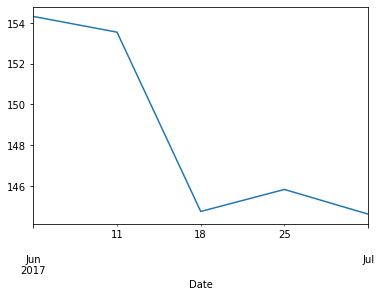

In [12]:
%matplotlib inline
df['Close'].resample('W').mean().plot()

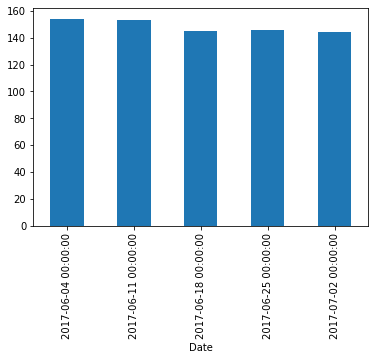

In [13]:
%matplotlib inline
df['Close'].resample('W').mean().plot(kind="bar")
#To have the bar chart

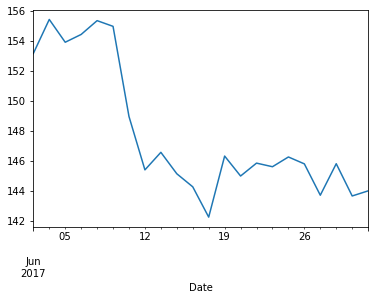

In [14]:
df.Close.plot()
#Whole month graph

Pandas Time Series Analysis to be continued from part 2